In [2]:
from keras.layers import Dense,activations,MaxPooling2D
from keras.models import Sequential

from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Data load
(train_imgs, train_labels),(test_imgs, test_labels)=mnist.load_data()

In [4]:
# Data Checkout
print ("The number of training examples is: ", train_imgs.shape[0])
print ("The number of test examples is: ", test_imgs.shape[0])
print ("The size of every img is: ", train_imgs.shape[1:])
num_classes=len(np.unique(train_labels))
print ("The number of classes is: ", num_classes)

The number of training examples is:  60000
The number of test examples is:  10000
The size of every img is:  (28, 28)
The number of classes is:  10


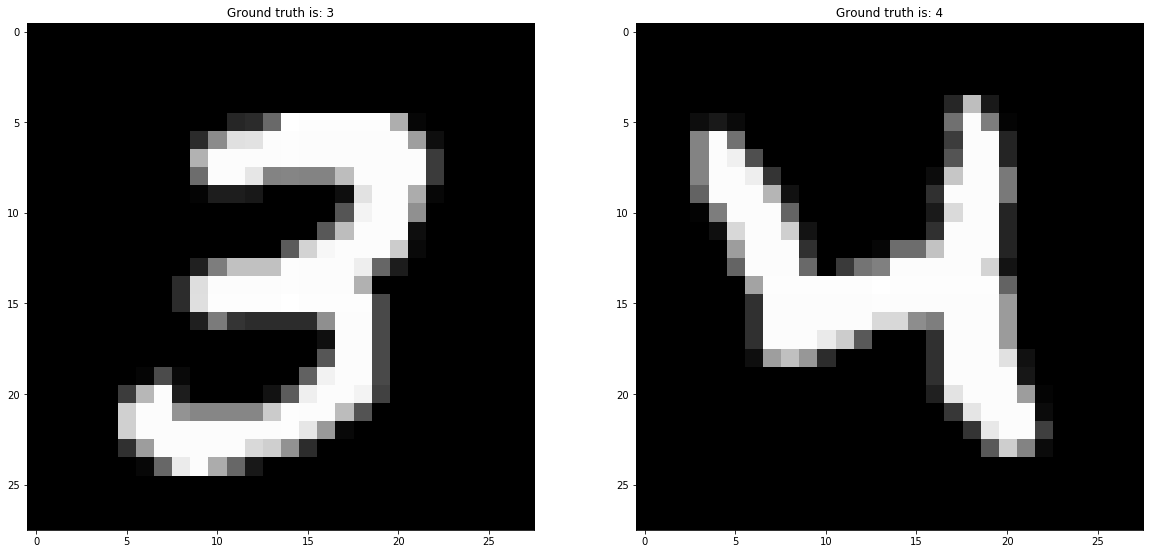

In [5]:
# printing out some samples
figure,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))

ax1.imshow(train_imgs[7,:,:],cmap='gray')
ax1.set_title("Ground truth is: {}".format(train_labels[7]))

ax2.imshow(train_imgs[20,:,:],cmap='gray')
ax2.set_title("Ground truth is: {}".format(train_labels[20]))

In [6]:
# Reshaping the input to be a vector instead of an array
dim_array=np.prod(train_imgs.shape[1:])
train_data=train_imgs.reshape(train_imgs.shape[0],dim_array)
test_data=test_imgs.reshape(test_imgs.shape[0],dim_array)

In [7]:
# Convert images to png (scale from 0 to 1)
train_data=train_data.astype('float32')
test_data=test_data.astype('float32')

train_data/=255
test_data/=255

In [8]:
#Converting labels to one-hot encoding form
from keras.utils.np_utils import to_categorical

train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

In [9]:
print("Before encoding",train_labels[5])
print("After encoding",train_labels_one_hot[5])

Before encoding 2
After encoding [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


In [10]:
#Create a network

model=Sequential()
model.add(Dense(512,activation='sigmoid',input_shape=(dim_array,)))
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(num_classes,activation='softmax'))

In [11]:
# Configure a network
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
# train a model 
history = model.fit(train_data, train_labels_one_hot, batch_size=256, nb_epoch=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s - loss: 0.6701 - acc: 0.7991 - val_loss: 0.3412 - val_acc: 0.8926
Epoch 2/20
60000/60000 [==============================] - 4s - loss: 0.2707 - acc: 0.9187 - val_loss: 0.2403 - val_acc: 0.9297
Epoch 3/20
60000/60000 [==============================] - 4s - loss: 0.2060 - acc: 0.9373 - val_loss: 0.1849 - val_acc: 0.9436
Epoch 4/20
60000/60000 [==============================] - 4s - loss: 0.1596 - acc: 0.9508 - val_loss: 0.1412 - val_acc: 0.9586
Epoch 5/20
60000/60000 [==============================] - 4s - loss: 0.1279 - acc: 0.9615 - val_loss: 0.1147 - val_acc: 0.9642
Epoch 6/20
60000/60000 [==============================] - 4s - loss: 0.1037 - acc: 0.9685 - val_loss: 0.1055 - val_acc: 0.96680.967 - ETA: 0s - lo
Epoch 7/20
60000/60000 [==============================] - 4s - loss: 0.0856 - acc: 0.9740 - val_loss: 0.1001 - val_acc: 0.9704
Epoch 8/20
60000/60000 [=================

In [44]:
# test 
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

 9952/10000 [============================>.] - ETA: 0sEvaluation result on Test Data : Loss = 0.07742417117598525, accuracy = 0.9814


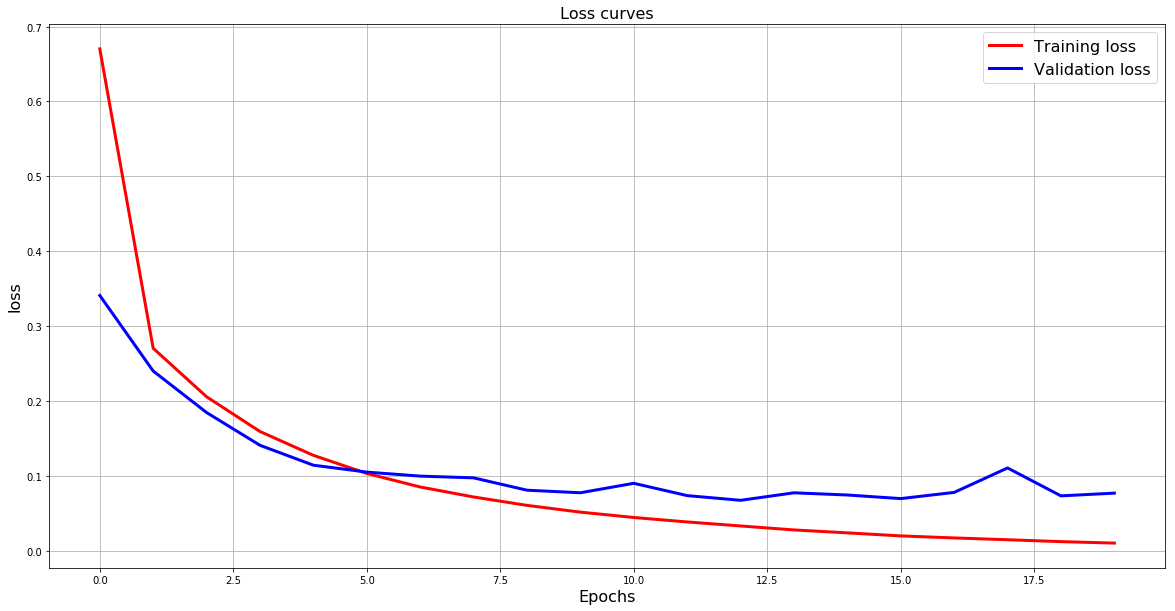

In [49]:
plt.figure(figsize=[20,10])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves',fontsize=16)
plt.grid()

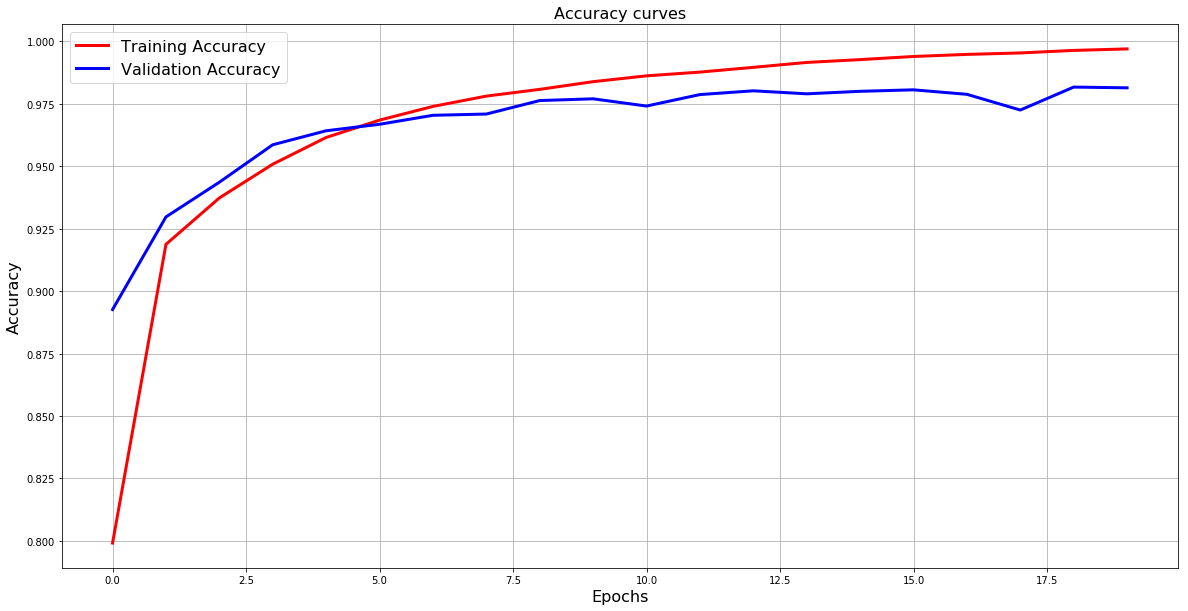

In [50]:
plt.figure(figsize=[20,10])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves',fontsize=16)
plt.grid()

In [15]:
# Check how dropout will affect validation accuracy

from keras.layers import Dropout

model=Sequential()
model.add(Dense(512,activation='sigmoid',input_shape=[dim_array,]))
model.add(Dropout(0.5))
model.add(Dense(512,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, nb_epoch=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s - loss: 0.8113 - acc: 0.7370 - val_loss: 0.3258 - val_acc: 0.9001
Epoch 2/20
60000/60000 [==============================] - 4s - loss: 0.3478 - acc: 0.8930 - val_loss: 0.2655 - val_acc: 0.9188
Epoch 3/20
60000/60000 [==============================] - 4s - loss: 0.2722 - acc: 0.9169 - val_loss: 0.1957 - val_acc: 0.9387
Epoch 4/20
60000/60000 [==============================] - 5s - loss: 0.2301 - acc: 0.9303 - val_loss: 0.1643 - val_acc: 0.9483
Epoch 5/20
60000/60000 [==============================] - 6s - loss: 0.1949 - acc: 0.9400 - val_loss: 0.1415 - val_acc: 0.9552
Epoch 6/20
60000/60000 [==============================] - 6s - loss: 0.1750 - acc: 0.9467 - val_loss: 0.1267 - val_acc: 0.9605
Epoch 7/20
60000/60000 [==============================] - 5s - loss: 0.1560 - acc: 0.9517 - val_loss: 0.1139 - val_acc: 0.9645
Epoch 8/20
60000/60000 [==============================] - 5s 

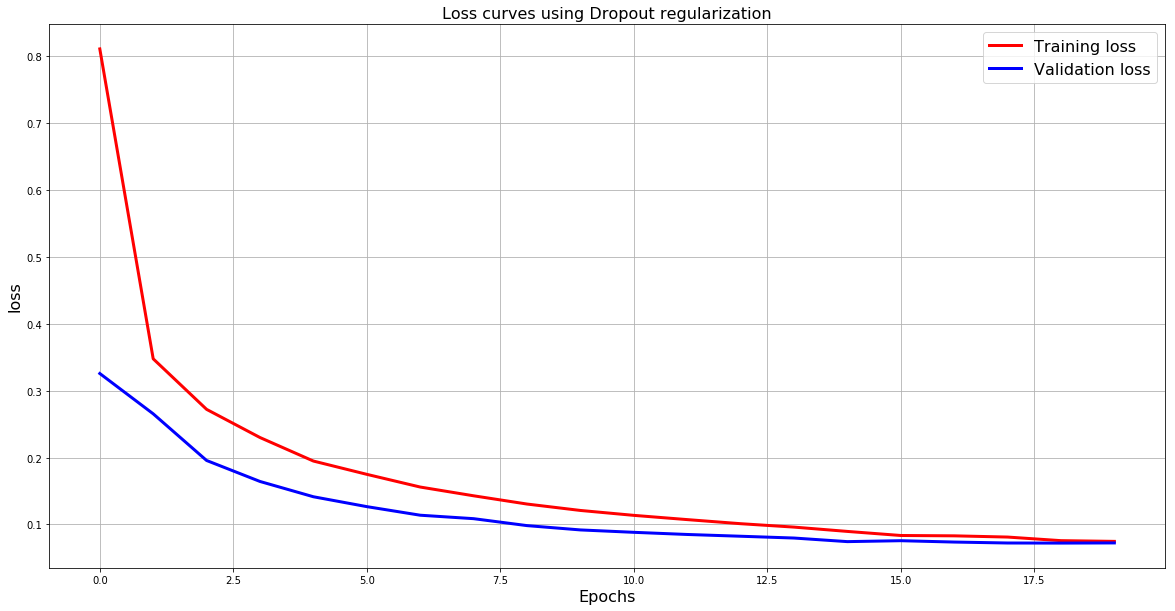

In [18]:
plt.figure(figsize=[20,10])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves using Dropout regularization',fontsize=16)
plt.grid()

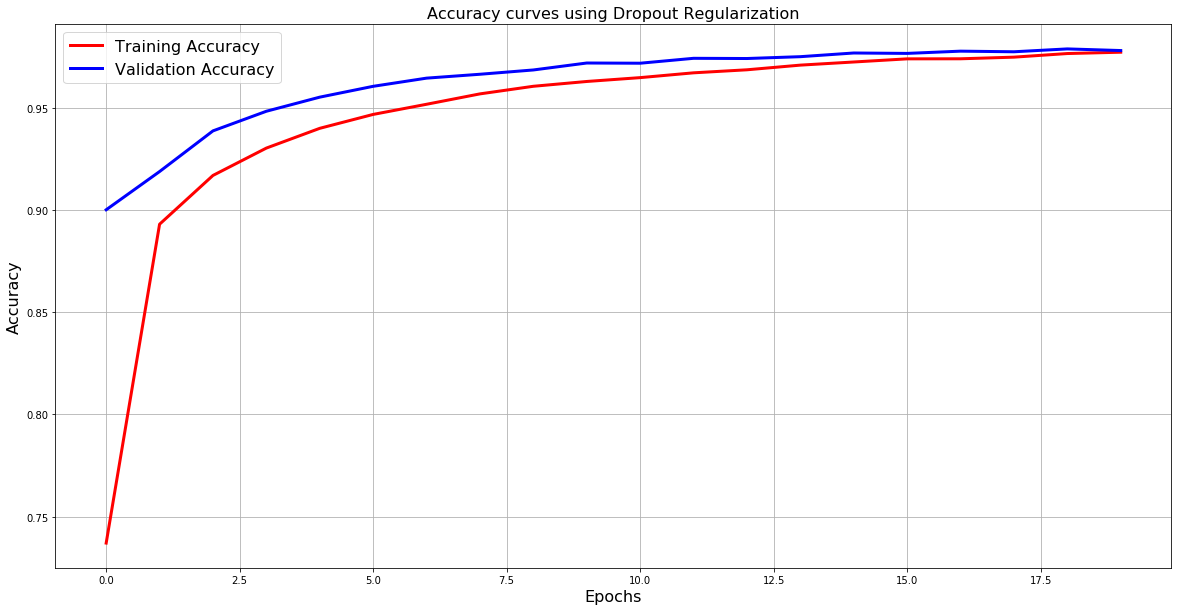

In [19]:
plt.figure(figsize=[20,10])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

In [23]:
model.predict(test_data[[8],:])

array([[  4.93132893e-06,   3.04325226e-07,   1.50645815e-06,
          2.67325959e-07,   4.52885812e-04,   8.78252804e-01,
          1.20098621e-01,   9.36936639e-10,   6.73334755e-04,
          5.15267137e-04]], dtype=float32)